#### I. IMPORTEZ LE JEU DE DONNEES "Churn_Modelling.csv"

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,  LabelBinarizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import  h5py
import tqdm as tqdm

In [10]:
### Ecrire le code y afférent ici
raw_data = pd.read_csv("Churn_Modelling.csv")
raw_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [11]:
### Le jeu de données contient des données bancaires
### L'on souhaite prédire les clients susceptibles de quitter la banque
### La variable d'intérêt: "Exited"

### II. DATA PRE-PROCESSING

#### II.1 Nettoyage des données

In [12]:
# i) Le jeu de données comporte-t-il des colonnes qui ne peuvent être
#    considérées comme des variables ? (Oui ou Non)

# Réponse attendue ici: 
#Oui
# ii) Si Oui, quel traitement vous semble-t-il approprié pour ces colonnes ?

## Code y afférent ici: 
data_quant = raw_data.drop(["RowNumber","Surname","CustomerId"], axis = 1)
data_quant.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [13]:
## Supprimer les doublons éventuels contenu dans le jeu de données
# Code y afférent ici
data_quant = data_quant.drop_duplicates()
data_quant.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


#### II.2 Données manquantes

In [14]:
# Le jeu de données comporte-t-il des données manquantes ? 
#NoN
# Conseil: Afficher le nombre de valeurs manquantes par variable
# Code y afférent ici: 
data_quant.isna().sum(axis = 0)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Au cas où, il y aurait des données manquantes, quelle méthode d'imputation
# préconisez - vous ? Indiquez la méthode préconisée par (type) variable.

#### II.3 Encodage

In [16]:
# Le jeu de données comporte-t-il des variables qualitatives ?
# Si oui, lesquelles ? (les énumérer éventuellement ci-dessous):
# Variables qualitatives: Geography, age)

In [17]:
# Précisez la méthode d'encodage que vous préconisez pour chacune de vos
# variables qualitatives. One_hot_encoder

#N.B.: Vous pouvez regrouper les variables devant être encodées pareillement
#nominal_features = Geography" = One_hot_Encoder
#ordinal_features = Gender = OrdinalEncoder

#### II.4 Normalisation

In [18]:
# Le jeu de données comporte-t-il des variables quantitatives ?
# Si oui, lesquelles ? (les énumérer éventuellement ci-dessous):
CreditScore                     
Age               
Tenure             
Balance            
NumOfProducts      
HasCrCard          
IsActiveMember     
EstimatedSalary    

NameError: name 'CreditScore' is not defined

In [19]:
# Précisez et justifiez la technique de normalisation que vous préconisez
# pour chacune de vos variables quantitatives. 
#Age : MinMaxScalaer:Cette technique met à l'échelle les valeurs dans une plage comprise entre 0 et 1. 
#creditScore:standardScaler
#tenure:standardscaler
#balance:standard scaler
#NumOfProduct:MinMaxScaler
#HasCrCard:MInmaxscaler

#### II.5 Partionnement du jeu de données

In [30]:
# Partitionnez votre jeu de données de manière à avoir:
# 80% et 20% pour les données d'apprentissage et de test respectivement
# Ecrire le code y afférent ici:
X = data_quant.iloc[:, :-1]
y = data_quant.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### II.6 Construction d'un pipeline

In [32]:
# Construire un pipeline pour réaliser le pré-traitement des données
# conformément aux résultats des précédentes questions
numerical_features = make_column_selector(dtype_include = np.number)
nominal_features  = make_column_selector(dtype_exclude = np.number)

nominal_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),
                                OneHotEncoder(drop = "first")
                                )

numerical_pipeline = make_pipeline(KNNImputer(n_neighbors = 5),
                                  RobustScaler()
                                  )
preprocessor = make_column_transformer((nominal_pipeline, nominal_features),
                                       (numerical_pipeline, numerical_features)
                                       )
X_train = preprocessor.fit_transform(X_train)

X_train.shape

(8000, 11)

### III. MODELISATION

#### III.1 Choix de la métrique

In [14]:
# Indiquez et justifiez la métrique qui vous semble la plus appropriée
# Ici:Accuracy

#### III.2 KNN

In [54]:
# Réaliser une validation croisée (avec cv = 5) tout en optimisant 
# au moins 2 hyper-paramètres du modéle KNN

# N.B.: 1- Songez à utiliser la classe: "GridSearchCV" du module 
#          "sklearn.model_selection"
#       2- Vous devez préciser: le nombre de validation croisée (cv = 5),
#          la métrique utilisée (à travers le paramètre "scoring") ainsi que
#          les hyper-paramètres
# Définis les hyperparamètres à tester pour le modèle KNN
param_grid = {
    'n_neighbors': np.arange(1, 51, 2),  # Nombre de voisins à considérer
    'weights': ['uniform', 'distance']  # Type de pondération
}



In [55]:
# Créez une instance du classifieur KNeighborsClassifier
knn = KNeighborsClassifier()

# Définissez une instance de GridSearchCV pour la validation croisée
cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


In [56]:
# Entrainez le modèle KNN avec les différents hyperparamètres et évaluez ses performances
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [65]:
#KNN.best= cv.best_estimators
#y_pred = KNN_best.predict(X_test)
#KNN_accuracy = accurancy_score(y_pred,y_test)

In [57]:
# Récupérez les meilleurs hyperparamètres et le meilleur score
best_params = cv.best_params_
best_score = cv.best_score_

# Affichez les meilleurs hyperparamètres et le meilleur score
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score d'exactitude:", best_score)


Meilleurs hyperparamètres: {'n_neighbors': 25, 'weights': 'distance'}
Meilleur score d'exactitude: 0.8408749999999999


In [58]:
# Quels sont les meilleurs hyper-paramètres au sens de la métrique retenue ?
# Meilleurs hyperparamètres: {'n_neighbors': 27, 'weights': 'uniform'}
# N.B.: Vous pourriez utiliser la méthode "best_params_"

In [17]:
# Quels sont les performances affichées par le meilleur modèle KNN sur les 
# données de test ?asZ

#Meilleur score d'exactitude: 0.8408749999999999
# N.B.: Vous pourriez utiliser les méthodes "best_estimator_" & "score"

#### III.3 Arbres binaires

In [70]:
# Réaliser une validation croisée (avec cv = 5) tout en optimisant 
# au moins 2 hyper-paramètres des arbres binaires

# N.B.: 1- Songez à utiliser la classe: "GridSearchCV" du module 
#          "sklearn.model_selection"
#       2- Vous devez préciser: le nombre de validation croisée (cv = 5),
#          la métrique utilisée (à travers le paramètre "scoring") ainsi que
#          les hyper-paramètres

# Définissez les hyperparamètres à tester pour le modèle Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critère de division des noeuds
    'max_depth': range(2, 21),  # Profondeur maximale des arbres
}


In [71]:

dt = DecisionTreeClassifier()


cv = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')


In [72]:
# Entrainez le modèle Decision Tree avec les différents hyperparamètres et évaluez ses performances
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 21)},
             scoring='accuracy')

In [73]:

best_params = cv.best_params_
best_score = cv.best_score_

print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score d'exactitude:", best_score)


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': 6}
Meilleur score d'exactitude: 0.858125


In [20]:
# Quels sont les meilleurs hyper-paramètres au sens de la métrique retenue ?

#Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': 6}
    
# N.B.: Vous pourriez utiliser la méthode "best_params_"

In [23]:
# Quels sont les performances affichées par le meilleur modèle KNN sur les 
# données de test ?

#Meilleur score d'exactitude: 0.858125

# N.B.: Vous pourriez utiliser les méthodes "best_estimator_" & "score"

#### III.4 Forêts aléatoires

In [66]:
# Réaliser une validation croisée (avec cv = 5) tout en optimisant 
# au moins 2 hyper-paramètres des forêts aléatoires

# N.B.: 1- Songez à utiliser la classe: "GridSearchCV" du module 
#          "sklearn.model_selection"
#       2- Vous devez préciser: le nombre de validation croisée (cv = 5),
#          la métrique utilisée (à travers le paramètre "scoring") ainsi que
#          les hyper-paramètres

from sklearn.ensemble import RandomForestClassifier

# Définis les hyperparamètres à tester pour le modèle Random Forest
param_grid = {
    'n_estimators': range(100, 301, 50),  # Nombre d'arbres décisionnels
    'max_depth': range(2, 11, 2),  # Profondeur maximale des arbres
}


In [67]:

rf = RandomForestClassifier()

# Définissez une instance de GridSearchCV pour la validation croisée
cv = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')


In [68]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 11, 2),
                         'n_estimators': range(100, 301, 50)},
             scoring='accuracy')

In [64]:
# Récupérez les meilleurs hyperparamètres et le meilleur score
best_params = cv.best_params_
best_score = cv.best_score_


print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score d'exactitude:", best_score)


Meilleurs hyperparamètres: {'max_depth': 10, 'n_estimators': 200}
Meilleur score d'exactitude: 0.8632500000000001


In [21]:
# Quels sont les meilleurs hyper-paramètres au sens de la métrique retenue ?

#Meilleurs hyperparamètres: {'max_depth': 10, 'n_estimators': 200}
# N.B.: Vous pourriez utiliser la méthode "best_params_"

In [24]:
# Quels sont les performances affichées par le meilleur modèle KNN sur les 
# données de test ?

#Meilleur score d'exactitude: 0.8632500000000001

# N.B.: Vous pourriez utiliser les méthodes "best_estimator_" & "score"

#### III.5 Regression logistique

In [75]:
# Réaliser une validation croisée (avec cv = 5) tout en optimisant 
# au moins 2 hyper-paramètres de la regression logistique

# N.B.: 1- Songez à utiliser la classe: "GridSearchCV" du module 
#          "sklearn.model_selection"
#       2- Vous devez préciser: le nombre de validation croisée (cv = 5),
#          la métrique utilisée (à travers le paramètre "scoring") ainsi que
#          les hyper-paramètres

param_grid = {
    'C': np.logspace(-5, 2, 10),  # Paramètre de régularisation L2
    'solver': ['lbfgs', 'sag']  # Algorithme de résolution
}


In [76]:

lr = LogisticRegression()

cv = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')


In [77]:

cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02]),
                         'solver': ['lbfgs', 'sag']},
             scoring='accuracy')

In [78]:

best_params = cv.best_params_
best_score = cv.best_score_

# Affichez les meilleurs hyperparamètres et le meilleur score
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score d'exactitude:", best_score)


Meilleurs hyperparamètres: {'C': 0.0774263682681127, 'solver': 'lbfgs'}
Meilleur score d'exactitude: 0.8110000000000002


In [22]:
# Quels sont les meilleurs hyper-paramètres au sens de la métrique retenue ?

# Meilleurs hyperparamètres: {'C': 0.0774263682681127, 'solver': 'lbfgs'}
    
# N.B.: Vous pourriez utiliser la méthode "best_params_"

In [25]:
# Quels sont les performances affichées par le meilleur modèle KNN sur les 
# données de test ?

 # 0.8110000000000002
    
# N.B.: Vous pourriez utiliser les méthodes "best_estimator_" & "score"

#### IV. MEILLEUR MODELE

In [26]:
# En fin de compte, quel est le meilleur modèle parmi tous ces modèles ?

# forêt aléatoire 

# Quel en est la performance ?
# 0.8632500000000001

### V. DEEP LEARNING

#### V.1 Génération aléatoire des données

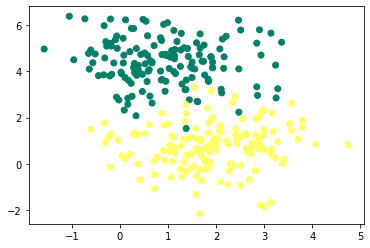

In [56]:
# Utilisez la fonction "make_blobs" du module "sklearn.datasets"
# pour générer aléatoirement un dataset de 300 observations et 
# de 2 variables explicatives


# Générer 300 observations et 2 variables explicatives
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 2, 
                 random_state = 0
                 )
y = y.reshape(-1, 1)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "summer")

#### V.2 Représentation graphique des données

In [57]:
# Construire un graphique du type scatter plot à partir des données ci-dessus


#### V.3 Programmation d'un perceptron

In [28]:
# Programmez un perceptron permettant de prédire y à partir de X

#N.B.: Cette fonction devrait retourner les sorties ci-après:
#      - costs: un dictionnaire comportant les coûts du train_set & test_set
#      - accuracy: un dictionnaire comportant la performance sur le train_set & test_set
#      - W: vecteur de paramètres
#      - b: valeur de la constante
#      - metrics: calculant plusieurs métriques (accuracy, recall...) sur le test_set



In [59]:
def starting_point(X):
    n_var = X.shape[1]
    W = np.random.randn(n_var, 1)
    b = np.random.randn(1)
    return (W,b)

In [60]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/ (1 + np.exp(-Z))
    return A
    

In [61]:
def predict(X, W, b):
    A = model(X, W, b)
    
    return (A >= 0.5)
#C'est pour connaitre la probabilite que y=0 ou y=1



In [62]:
def cost_function(A, y, epsilon = 1e-15):
    cost = -1/len(y)*np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1-A + epsilon))
    return cost

In [63]:
def compute_gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    
    return (dW, db)
    

In [64]:
def move(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return (W, b)

In [71]:
def perceptron(X, y, learning_rate = 0.1, n_cycle = 250):
    W, b = starting_point(X)
    
    cost_list = []
    
    for i in range(n_cycle):
        A = model(X, W, b)
        cost = cost_function(A, y)
        cost_list.append(cost)
        dW, db = compute_gradients(A, X, y)
        W, b = move(W, b, dW, db, learning_rate)
     
    y_pred = predict(X, W, b)
    metrics = {}
    metrics["Accuracy"] = np.round(accuracy_score(y, y_pred), 2)
    metrics["precision"] = np.round(precision_score(y, y_pred), 2)
    metrics["recall"] = np.round(recall_score(y, y_pred), 2)
    
    return (cost_list, W, b, metrics)

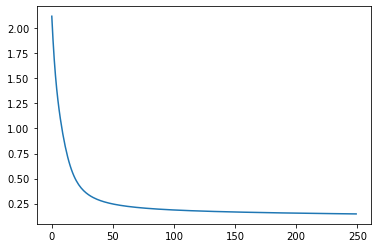

{'Accuracy': 0.94, 'precision': 0.96, 'recall': 0.91}


In [72]:
costs, W, b, metrics = perceptron(X, y)

plt.plot(costs)
plt.show()
print(metrics)

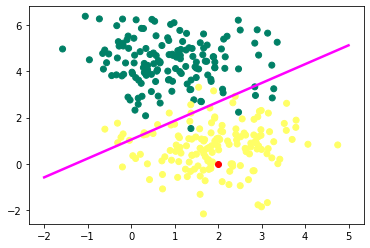

In [73]:
new_obs = np.array([2, 0])
x1 = np.linspace(-2, 5, 100)
x2 = (-W[0] * x1 - b)/ W[1]

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "summer")
plt.scatter(new_obs[0], new_obs[1], c = "red")
plt.plot(x1, x2, c =  "magenta", lw = 2.5)
plt.show()


In [23]:
# Représentez les coûts (sur le même graphique) et les accuracy pour les 
# training_set et test_set

# Commentez les graphes obtenus

In [93]:
# Représentez à nouveau le graphique du type scatter plot en y rajoutant 
# la frontière de décision


#### V.4 Programmation d'un réseau de neurone à 2 couches

In [94]:
def neural_network2(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_cycle = 250):
    
    # Initialisation des paramètres W & b
    W, b = starting_point(X_train)
    
    cost_list_train = []
    cost_list_test = []
        
    accuracy_train = []
    accuracy_test = [] 
    
    
    # Entraînement du modèle
    for i in range(n_cycle):
        
        # Calcul des fonctions d'activation
        A = model(X_train, W, b)
        
        if (i%5 == 0):
            # train_set
            cost = cost_function(A, y_train)
            cost_list_train.append(cost)
            y_pred = predict(X_train, W, b)
            acc = accuracy_score(y_train, y_pred)
            accuracy_train.append(acc)
            
            # test_set
            A_test = model(X_test, W, b)
            cost = cost_function(A_test, y_test)
            cost_list_test.append(cost)
            y_pred = predict(X_test, W, b)
            acc = accuracy_score(y_test, y_pred)
            accuracy_test.append(acc)
        
        # Déplacement dans l'espace engendré par W & b        
        dW, db = compute_gradients(A, X_train, y_train)
        W, b = move(W, b, dW, db, learning_rate)
        
    y_pred = predict(X_test, W, b)
    metrics = {}
    metrics["accuracy"] = np.round(accuracy_score(y_test, y_pred), 2)
    metrics["precision"] = np.round(precision_score(y_test, y_pred), 2)
    metrics["recall"] =  np.round(recall_score(y_test, y_pred), 2)
    costs_list = {"train":cost_list_train, "test":cost_list_test}
    accuracy_list = {"train":accuracy_train, "test":accuracy_test}
    
    return (costs_list, accuracy_list, W, b, metrics)


In [95]:
costs_list, accuracy_list, W, b, metrics = \
  neural_network2(X_train, y_train, X_test, y_test, 
                  learning_rate = 0.01, n_cycle = 100
                 )

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.plot(costs_list["train"], label = "train data")
plt.plot(costs_list["test"], label = "test data")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(accuracy_list["train"], label = "train data")
plt.plot(accuracy_list["test"], label = "test data")
plt.legend()


TypeError: predict() takes 2 positional arguments but 3 were given

In [34]:
# Représentez les coûts (sur le même graphique) et les accuracy pour les 
# training_set et test_set

 #Commentez les graphes obtenus

In [35]:
# Représentez à nouveau le graphique du type scatter plot en y rajoutant 
# la frontière de décision

#### V.5 Reconnaissance d'images: chat vs chien

In [36]:
# Utilisez le réseau de neurones ci-dessus pour distinguer les chats des chiens
# à l'aide du jeu de données à votre disposition


In [ ]:
# Représentez les coûts (sur le même graphique) et les accuracy pour les 
# training_set et test_set

# Commentez les graphes obtenus